In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [107]:
df = pd.read_excel('/Users/saki/Desktop/AI-Human-PewData.xlsx')

In [108]:
df.head()

,Unnamed: 0,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [109]:
len(df)

10260

In [110]:
c_df = df.iloc[0:10260]

predictors = ['F_METRO', 'F_CREGION', 'F_AGECAT','F_GENDER','F_EDUCCAT','F_EDUCCAT2','F_RELIG','F_PARTY_FINAL','F_INC_SDT1']
outcome = 'SMALG2_W99'

In [111]:
X = c_df[predictors]
y = c_df[outcome]
clean_df = c_df[predictors + [outcome]]
clean_df.head()


,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99
0,Metropolitan,West,65+,A man,College graduate+,College graduate/some post grad,Nothing in particular,Republican,"$50,000 to less than $60,000",NaN
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society
3,Metropolitan,West,50-64,A woman,College graduate+,Postgraduate,Protestant,Republican,"$100,000 or more",NaN
4,Metropolitan,South,65+,A woman,Some College,Associate's degree,Protestant,Independent,"$30,000 to less than $40,000",NaN


In [112]:
# Replace "refused" responses with NaN
# Assuming "refused" is represented as the string "Refused"
clean_df.replace("Refused", pd.NA, inplace=True)

clean_df = clean_df.dropna()

/var/folders/v8/61xx6l9j6t3bbm3w1j9thf480000gn/T/ipykernel_33111/604183416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.replace("Refused", pd.NA, inplace=True)


In [113]:
clean_df.head()

,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society
5,Non-metropolitan,Midwest,65+,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Bad idea for society
6,Metropolitan,South,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
8,Metropolitan,West,50-64,A woman,Some College,"Some college, no degree",Protestant,Republican,"$100,000 or more",Bad idea for society


In [114]:
clean_df["F_EDU"] = clean_df['F_EDUCCAT'] + ' : ' + clean_df['F_EDUCCAT2']
clean_df['F_LOCAL'] = clean_df['F_METRO'] + ' : ' + clean_df['F_CREGION']


In [115]:
clean_df.head()

,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99,F_EDU,F_LOCAL
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society,"Some College : Some college, no degree",Non-metropolitan : Midwest
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society,College graduate+ : Postgraduate,Metropolitan : Northeast
5,Non-metropolitan,Midwest,65+,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Bad idea for society,College graduate+ : College graduate/some post...,Non-metropolitan : Midwest
6,Metropolitan,South,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society,"Some College : Some college, no degree",Metropolitan : South
8,Metropolitan,West,50-64,A woman,Some College,"Some college, no degree",Protestant,Republican,"$100,000 or more",Bad idea for society,"Some College : Some college, no degree",Metropolitan : West


In [116]:
len(clean_df)

4835

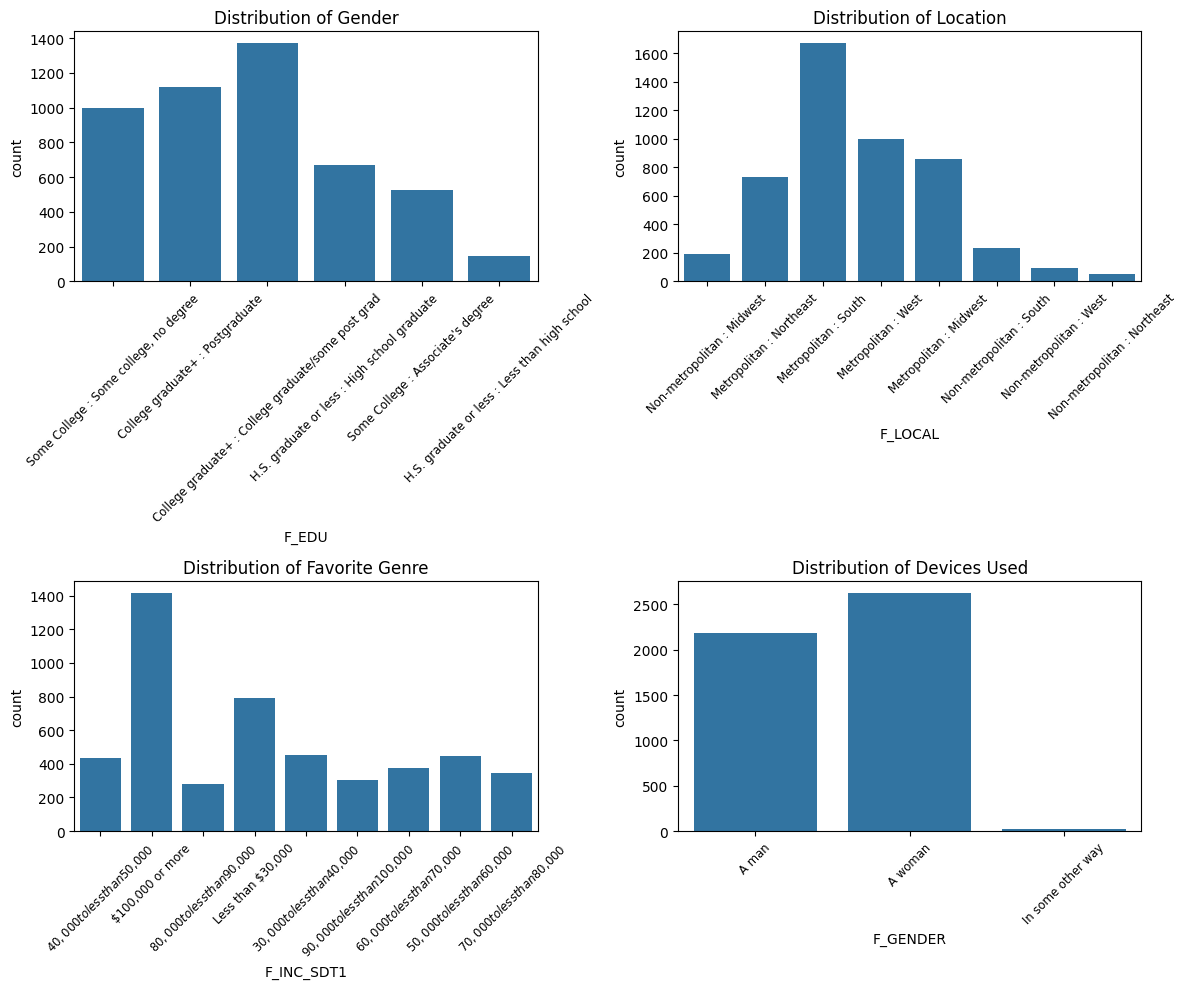

In [145]:
# Bar charts for categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='F_EDU', data=clean_df, ax=axes[0, 0]).set_title('Distribution of Gender')
sns.countplot(x='F_LOCAL', data=clean_df, ax=axes[0, 1]).set_title('Distribution of Location')
sns.countplot(x='F_INC_SDT1', data=clean_df, ax=axes[1, 0]).set_title('Distribution of Favorite Genre')
sns.countplot(x='F_GENDER', data=clean_df, ax=axes[1, 1]).set_title('Distribution of Devices Used')


# Rotate x-axis labels for all subplots
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45, labelsize='small')

plt.tight_layout()
plt.show()

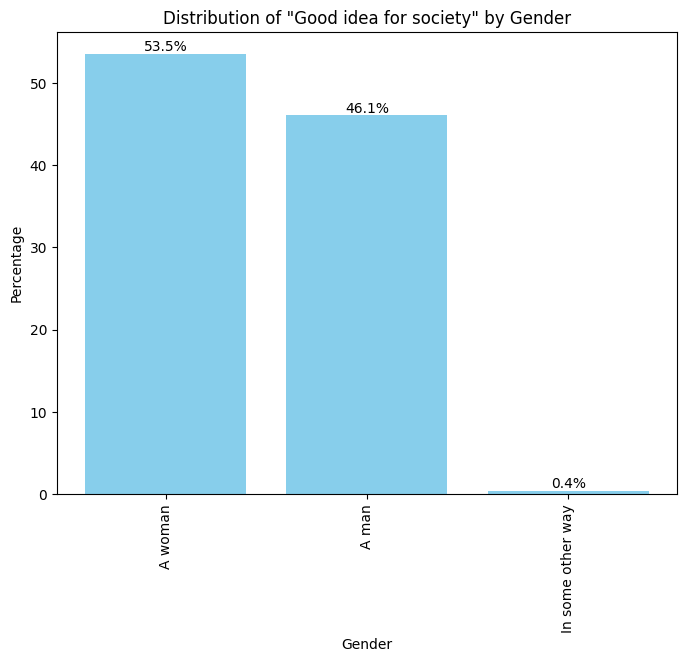

In [224]:

good_idea_data = clean_df[clean_df['SMALG2_W99'] == 'Good idea for society']

# number of diff gender
gender_counts = good_idea_data['F_GENDER'].value_counts(normalize=True) * 100

# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color='skyblue')

# percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')


plt.title('Distribution of "Good idea for society" by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=90) 
plt.show()

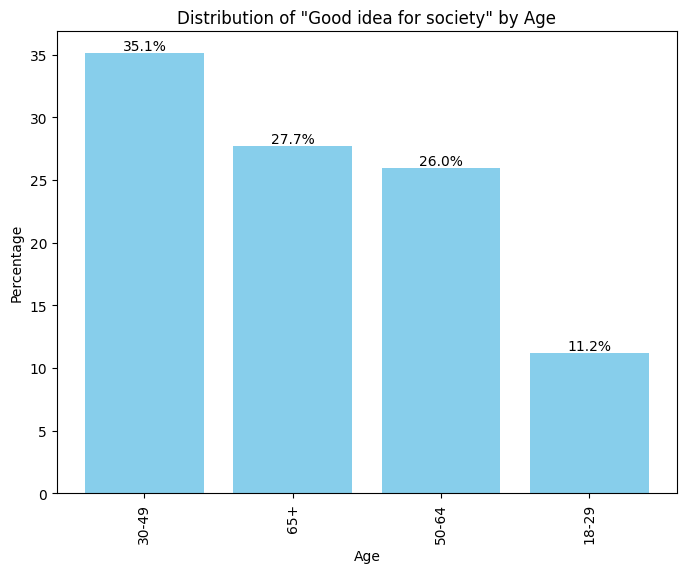

In [225]:
age_counts = good_idea_data['F_AGECAT'].value_counts(normalize=True) * 100

# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue')

# percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')


plt.title('Distribution of "Good idea for society" by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(rotation=90) 
plt.show()

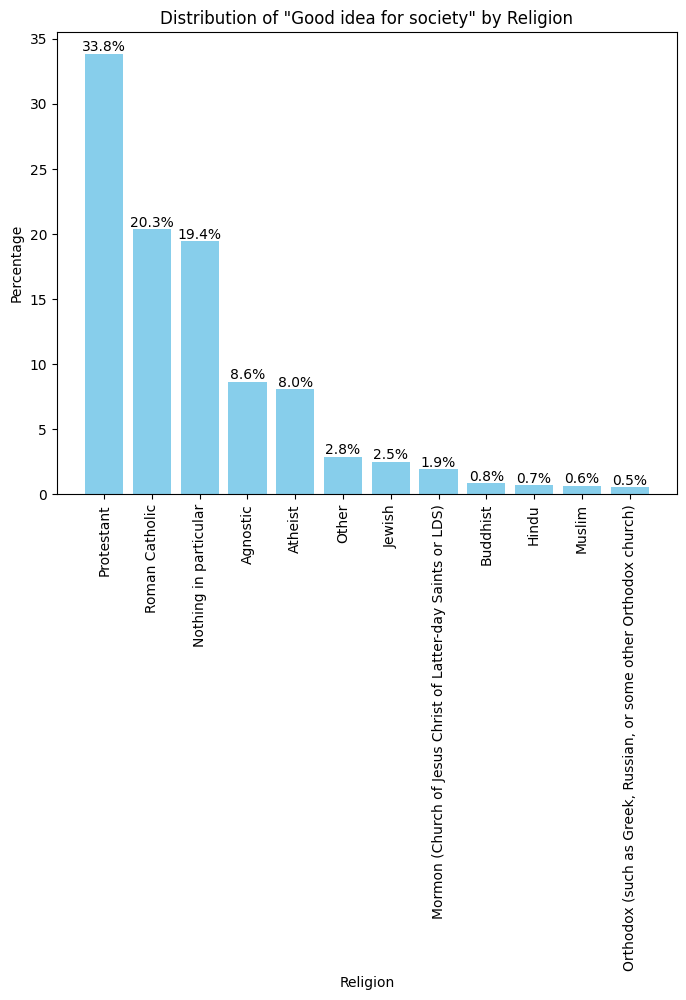

In [226]:
relig_counts = good_idea_data['F_RELIG'].value_counts(normalize=True) * 100

# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(relig_counts.index, relig_counts.values, color='skyblue')

# percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')


plt.title('Distribution of "Good idea for society" by Religion')
plt.xlabel('Religion')
plt.ylabel('Percentage')
plt.xticks(rotation=90) 
plt.show()

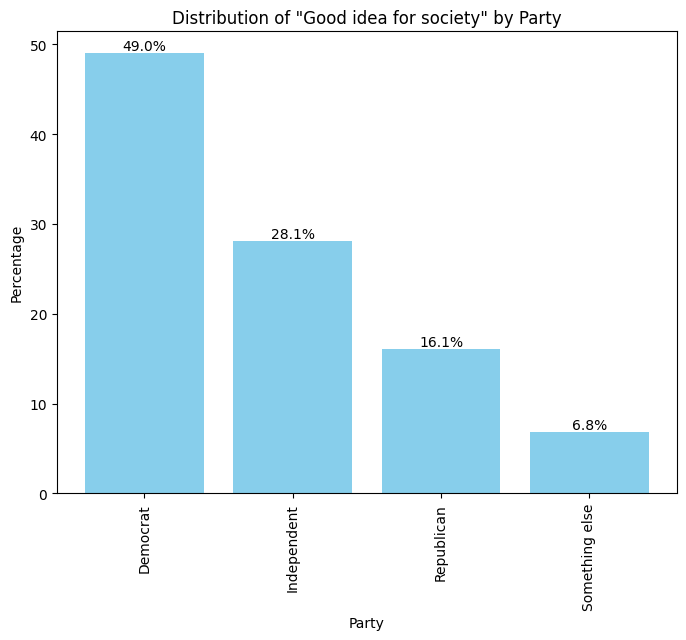

In [227]:
party_counts = good_idea_data['F_PARTY_FINAL'].value_counts(normalize=True) * 100

# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(party_counts.index, party_counts.values, color='skyblue')

# percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')


plt.title('Distribution of "Good idea for society" by Party')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=90) 
plt.show()

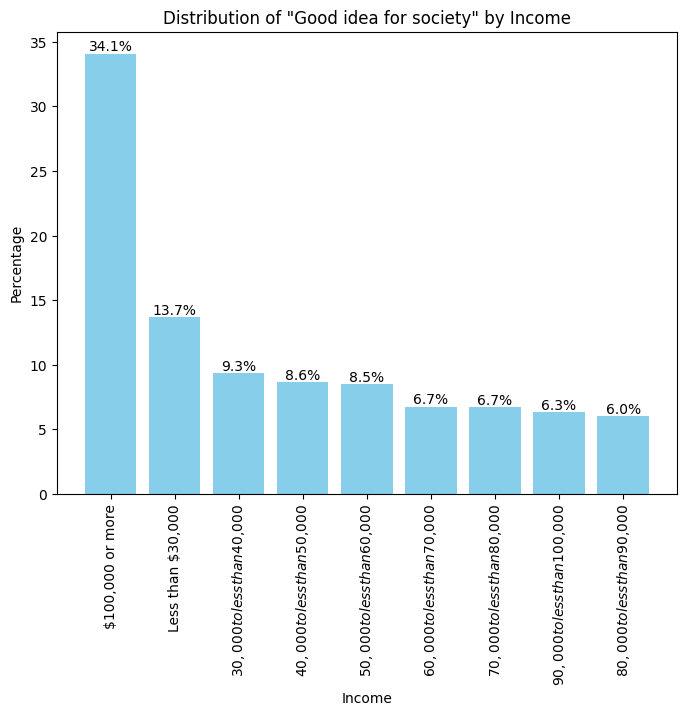

In [228]:

inc_counts = good_idea_data['F_INC_SDT1'].value_counts(normalize=True) * 100

# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(inc_counts.index, inc_counts.values, color='skyblue')

# percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')


plt.title('Distribution of "Good idea for society" by Income')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xticks(rotation=90) 
plt.show()

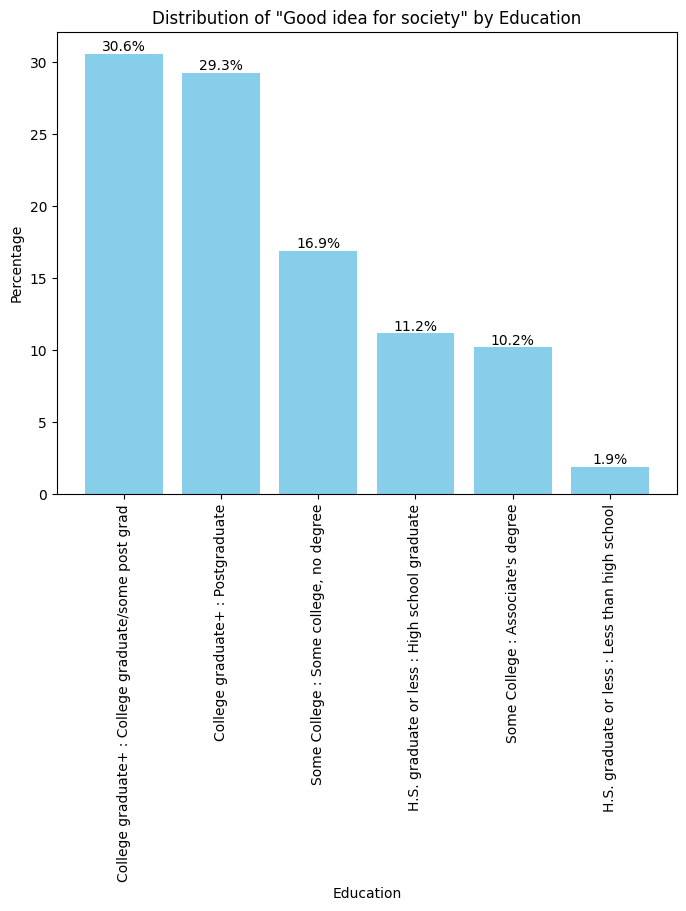

In [229]:

edu_counts = good_idea_data['F_EDU'].value_counts(normalize=True) * 100


# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(edu_counts.index, edu_counts.values, color='skyblue')

# percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')


plt.title('Distribution of "Good idea for society" by Education')
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.xticks(rotation=90) 
plt.show()

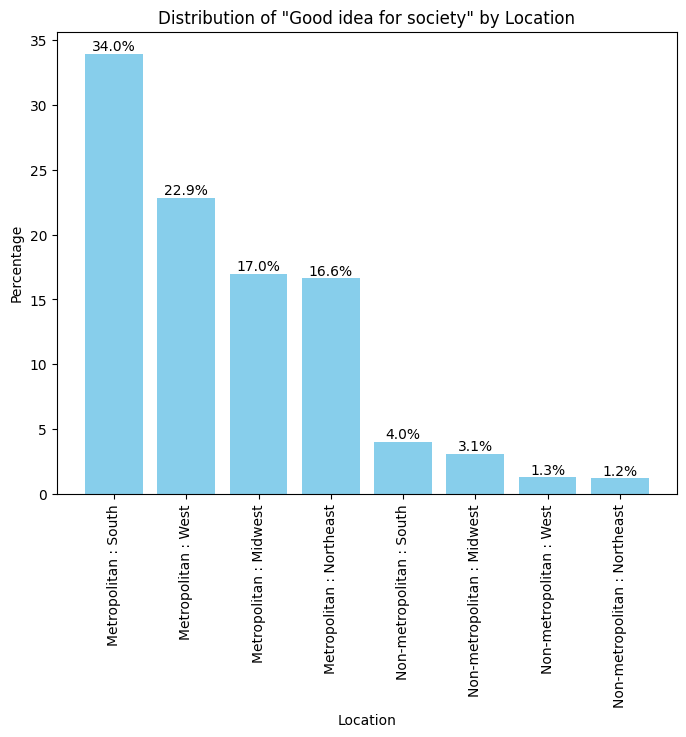

In [230]:
local_counts = good_idea_data['F_LOCAL'].value_counts(normalize=True) * 100

# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(local_counts.index, local_counts.values, color='skyblue')

# percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')


plt.title('Distribution of "Good idea for society" by Location')
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.xticks(rotation=90) 
plt.show()



